Practice the course "Manipulating Time Series Data in Python" of Datacamp

### I. Manipulating Time Series Data in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### II. Basic Time Series Metrics & Resampling
#### Compare times series grow rate

### 1. Normalizing a single series
+ Example: compare the performance of various stocks 
+ Problem: they are at different levels, not easy to do so from a single chart
+ Solutions: normalize all price series by dividing each time series by its first value.
+ Source code: df.div(df.iloc[0]).mul(100)
+ The first value equals 100. Hence, we have the same start, easy to compare.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


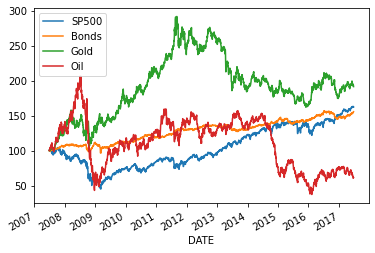

In [2]:
# Import data here
prices = pd.read_csv('data/stock_data/asset_classes.csv', parse_dates=True, index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

In [3]:
prices['Gold'].max()/prices['Gold'].min()

2.919336163643381

Notes:
+ All start at 100. 
+ Gold increased by 300 percentage points to around 2.9 times its original value.

### 2. Normalizing multiple series

In [4]:
# Import stock prices and index here
stocks = pd.read_csv('data/stock_data/nyse.csv', parse_dates=True, index_col='date')
dow_jones = pd.read_csv('data/stock_data/dow_jones.csv', parse_dates=True, index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,64.68,42.85,69.15,10583.96
2010-01-05,63.93,43.68,69.42,10572.02
2010-01-06,64.45,43.92,70.02,10573.68
2010-01-07,63.99,44.79,69.80,10606.86
2010-01-08,64.21,44.68,69.52,10618.19


In [5]:
# Normalize and plot your data here
# 98.840445 = 63.93/64.68*100 
# 101.936989 = 43.68/42.85*100
normalized = data.div(data.iloc[0]).mul(100)
normalized.head()

,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,98.840445,101.936989,100.390456,99.887188
2010-01-06,99.644403,102.497083,101.258134,99.902872
2010-01-07,98.933210,104.527421,100.939986,100.216365
2010-01-08,99.273346,104.270712,100.535069,100.323414


In [6]:
normalized.head()
plt.show()

### 3. Comparing stock prices with a benchmark

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


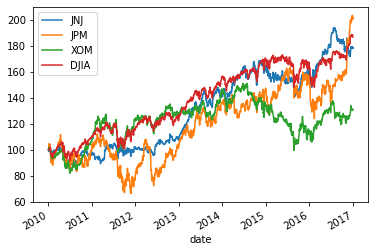

In [7]:
# Import stock prices and index here
stocks = pd.read_csv('data/stock_data/nyse.csv', parse_dates=True, index_col='date')
dow_jones = pd.read_csv('data/stock_data/dow_jones.csv', parse_dates=True, index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

### Resampling

+ Resampling involves changing the frequency of your time series observations.

+ Two types of resampling are:
    - Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
    - Downsampling: Where you decrease the frequency of the samples, such as from days to months.


### 4. Plot performance difference vs benchmark index

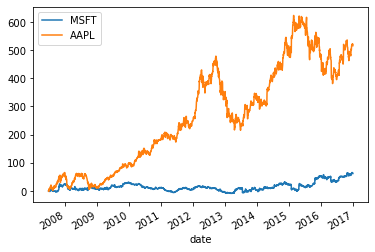

In [8]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('data/stock_data/msft_aapl.csv', parse_dates=True, index_col='date')

# Import index here
sp500 = pd.read_csv('data/stock_data/sp500.csv', parse_dates=True, index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

### 5. Convert monthly to weekly data
+ Use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.
+ Create monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start, end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start, end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### 6. Create weekly from monthly unemployment data
+ The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

+ You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

In [11]:
# Import data here
data = pd.read_csv('data/stock_data/djia2.csv', parse_dates=True, index_col='DATE')

# Show first five rows of weekly series
print(data.asfreq(freq='W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq(freq='W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq(freq='W', method='ffill')
print(weekly_ffill.head())

            DJIA
DATE            
2010-01-10   NaN
2010-01-17   NaN
2010-01-24   NaN
2010-01-31   NaN
2010-02-07   NaN
                  DJIA
DATE                  
2010-01-10  100.756144
2010-01-17  101.336645
2010-01-24   96.342579
2010-01-31   96.235530
2010-02-07   93.617039
                  DJIA
DATE                  
2010-01-10  100.323414
2010-01-17  100.242726
2010-01-24   96.116954
2010-01-31   95.118746
2010-02-07   94.598147


## A. Upsampling

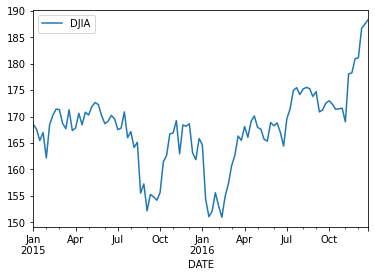

In [12]:
# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

###  7. Use interpolation to create weekly employment data
+ You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.
+ Compare your previous approach to the new .interpolate() method that you learned about in this video.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None


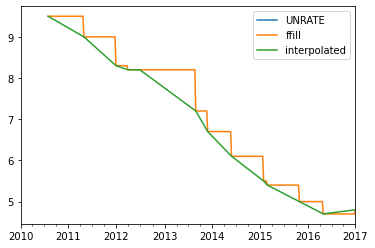

In [13]:
monthly = pd.read_csv('data/stock_data/unrate.csv', parse_dates=True, index_col='DATE')

# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

###  8. Interpolate debt/GDP and compare to unemployment

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


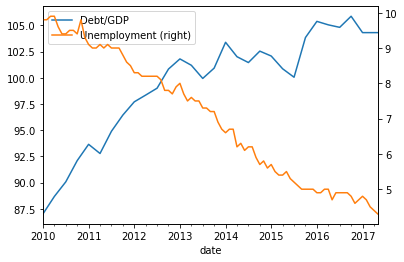

In [14]:
# Import & inspect data here
data = pd.read_csv('data/stock_data/debt_unemployment.csv', parse_dates=True, index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

## B. Downsampling & aggregation

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


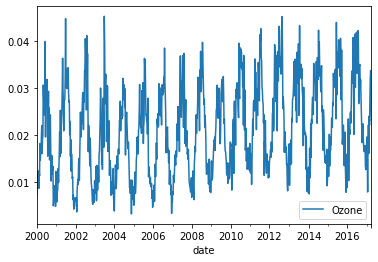

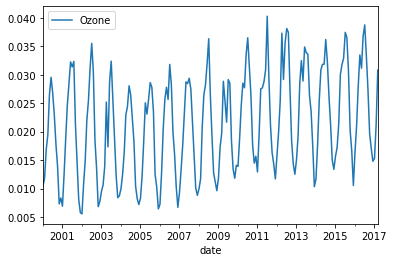

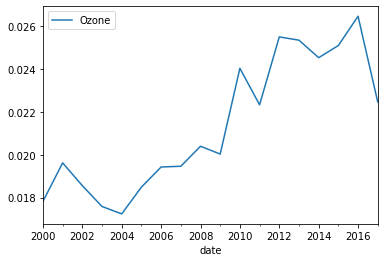

In [15]:
# Import and inspect data here
ozone = pd.read_csv("data/air_quality_data/ozone_nyc.csv", parse_dates=["date"], index_col="date")
ozone.info()

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB
None


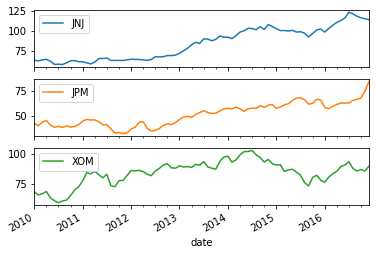

In [16]:
# Import and inspect data here
stocks = pd.read_csv("data/stock_data/nyse.csv", parse_dates=True, index_col="date")
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True);
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


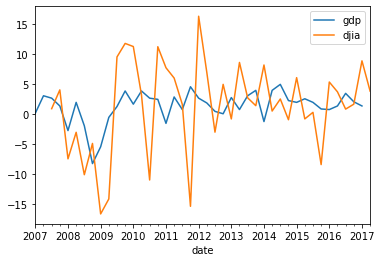

In [17]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv("data/stock_data/gdp_growth.csv", parse_dates=True, index_col="date")
gdp_growth.info()

# Import and inspect djia here
djia = pd.read_csv("data/stock_data/djia.csv", parse_dates=True, index_col="date")
djia.info()

djia_quarterly = djia.resample('QS').first()

# Calculate djia quarterly returns here 
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


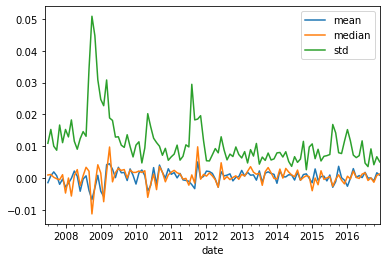

In [18]:
# Import data here
sp500 = pd.read_csv("data/stock_data/sp500.csv", parse_dates=True, index_col="date")
sp500.info()

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])

# Plot stats here
stats.plot()
plt.show()